# Projeto de Visualização de Dados
### Autor: Alan G. W. Gayger
### Dataset: netflix_titles.csv (dados de títulos disponíveis na Netflix em janeiro de 2021)
# Título: Qual é o público melhor atendido pela Netflix?


# Introdução

- Introdução:
    - Computadores, celulares, internet e boom! Os anos 2000 chegaram trazendo inúmeras novidades às nossas vidas e a velocidade com a qual surgem essas inovações só aumenta. Nesse contexto de transformação digital e tecnológica, a Netflix firmou-se como a maior empresa de streamming de filmes e séries do mundo e como uma das principais fontes de entretenimento modernas. 
    - Pessoalmente, eu me incluo no grupo de pessoas que não imagina um final de semana sem poder sentar no sofá e relaxar assistindo algo na Netflix. Entretanto, apesar de todo o meu apreço pela plataforma, em alguns momentos eu chego a me sentir perdido em meio a tantos e tão variados títulos e acabo sofrendo pra decidir qual assistir. Pensando nessa dificuldade – e considerando que outras pessoas também possam sentir-se da mesma maneira – decidi tentar esclarecer um pouco a situação respondendo à seguinte pergunta: “Qual é o público melhor atendido pela empresa?” 
    - Para responder tal questão, realizei um estudo utilizando uma base de dados de todos os títulos disponíveis na Netflix em janeiro de 2021, contendo 7777 obras, sendo elas 5377 filmes e 2400 séries. O processo de análise foi baseado, em sua maioria, em visualizações gráficas desses registros e pode ser dividido em cinco tópicos: ano de lançamento, duração, país, gênero, rating (classificação etária).


# Análise Exploratória e Visualização de Dados

In [129]:
# Pacotes importados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import re
from functools import reduce
from collections import Counter

## Limpeza de dados:

In [130]:
# lendo documento csv
netflix_dados = pd.read_csv('netflix_titles.csv', index_col='show_id').rename_axis('id', axis='rows')

In [131]:
# Inspecionando o dataframe
netflix_dados.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [132]:
netflix_dados.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
id,,,,,,,,,,,
s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [133]:
# Verificando composição do Dataset
movies, shows = netflix_dados.type.value_counts()
total = len(netflix_dados)
print(f'Total obras: {total}\nTotal filmes: {movies}\t Proporção filmes: {movies / total:.2f}\nTotal séries: {shows}\t Proporção séries: {shows / total:.2f}')

Total obras: 7787
Total filmes: 5377	 Proporção filmes: 0.69
Total séries: 2410	 Proporção séries: 0.31


## Tratando NaN

In [134]:
# Verificando proporção de valores faltantes
porc_incompleta = (netflix_dados.isnull().sum().sum() / np.product(netflix_dados.shape)) * 100
print(porc_incompleta) 

4.238999731487211


In [135]:
# Verificando quantidade de valores faltantes por coluna
cols_incompletas = list(netflix_dados.loc[:, netflix_dados.isnull().sum()>0].columns)
netflix_dados[cols_incompletas].isnull().sum() 

director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

In [136]:
# tratando dados - substituindo NaN em variáveis categóricas por "Unknown"
netflix_dados[['director', 'cast', 'rating', 'country']] = netflix_dados[['director', 'cast', 'rating', 'country']].fillna('Unknown')

In [137]:
# descartando dados restantes com NaN (essa operação não gera grande perda de informação, pois são descartadas apenas 10 linhas com NaN no campo date_added)
netflix_dados = netflix_dados.dropna()

## Formatando datas

In [138]:
# formatando coluna release_year com formato datetime
netflix_dados['release_year'] = pd.to_datetime(netflix_dados['release_year'], format='%Y') 

In [139]:
netflix_dados.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
id,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020-01-01,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016-01-01,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011-01-01,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009-01-01,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Análise Gráfica

### Funções de Visualização

In [140]:
# Função para plotar histogramas

def Plota_histograma(serie_1, serie_2, titulo_1, titulo_2, eixoX_1='', eixoX_2='', bins_1=True, bins_2=True):
    
    
    # configurando tamanho da figura e cor dos plots
    cor = '#E50914'
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    
    # configurando tamanho de título, textos dos eixos x e y e títulos dos eixos x e y
    tamanho_titulo, tamanho_x, tamanho_y, rotulo_x_1, rotulo_x_2 = 13.5, 11.5, 11.5, 12, 12
    ax[0].set_title(titulo_1, fontsize=tamanho_titulo)
    ax[0].tick_params(axis='y', labelsize=tamanho_y)
    ax[0].tick_params(axis='x', labelsize=tamanho_x)
    ax[1].set_title(titulo_2, fontsize=tamanho_titulo)
    ax[1].tick_params(axis='y', labelsize=tamanho_y)
    ax[1].tick_params(axis='x', labelsize=tamanho_x)
    
    # configurando valores mínimo e máximo para eixo x do histograma na figura 1
    # configurando quantidade de barras no histogramana na figura 1
    bins = None
    if bins_1 == True:
        bins = len(serie_1.unique())
    ax[0].set_xlim(float(serie_1.min()), float(serie_1.max()))
    sns.distplot(serie_1, bins=bins, kde=False, ax=ax[0], color={cor}) # plotando figura 1
    ax[0].set_xlabel(eixoX_1, fontsize = rotulo_x_1)

    # configurando valores mínimo e máximo para eixo x do histograma na figura 2
    # configurando quantidade de barras no histogramana na figura 2
    bins = None
    if bins_2 == True:
        bins = len(serie_2.unique())
    ax[1].set_xlim(float(serie_2.min()), float(serie_2.max()))
    sns.distplot(serie_2, bins=bins, kde=False, ax=ax[1], color={cor}) # plotando figura 2
    ax[1].set_xlabel(eixoX_2, fontsize = rotulo_x_2)


In [141]:
# Função para preparar séries para plotar gráficos de barras

def Prepara_texto(tipo, coluna):
    

    # dados_filtrados recebe série com tipo (TV Show/Movie) e coluna (contendo strings) desejados
    dados_filtrados = netflix_dados[netflix_dados['type'] == tipo][coluna] 
    # junta strings da coluna desejada e conta quantas vezes cada palavra repete-se em string_dados
    string_dados = ' ' + reduce(lambda x, y: ', '.join((x.lower().strip(), y.lower().strip())), dados_filtrados) + ',' 
    contador_dados = Counter(re.findall(r"(?<=\s)[\w\s'&-]+,", string_dados)) 
    # transforma contador_dados em série e retira "," presente ao final das palavras em série series_dados (carácter presente devido à conveniência no tratamento dos dados)
    series_dados = pd.Series(contador_dados).sort_values(ascending=False).drop(['unknown,'], errors='ignore') 
    series_dados.index = series_dados.index.str[:-1] 
    return series_dados


In [142]:
# Função para plotar gráficos de barras

def Plota_primeiros_barras(serie_1, serie_2, titulo_1, titulo_2):
    
    
    # configurando tamanho da figura e cor dos plots
    cor = '#E50914'
    fig, ax = plt.subplots(1, 2, figsize=(28, 12))
    
     # configurando tamanho de título, textos dos eixos x e y e títulos dos eixos x e y
    tamanho_titulo, tamanho_x, tamanho_y = 13.5, 11.5, 11.5
    ax[0].set_title(titulo_1, fontsize=tamanho_titulo)
    ax[0].tick_params(axis='y', labelsize=tamanho_y, left=False)
    ax[0].tick_params(axis='x', labelsize=tamanho_x)
    ax[1].set_title(titulo_2, fontsize=tamanho_titulo)
    ax[1].tick_params(axis='y', labelsize=tamanho_y, left=False)
    ax[1].tick_params(axis='x', labelsize=tamanho_x)
    
    # retirando bordas superior e direita dos gráficos do seaborn
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    
    # plotando figuras 1 e 2
    sns.barplot(x=serie_1.iloc[:5], y=serie_1.iloc[:5].index.str.title(), ax=ax[0], palette={cor})
    sns.barplot(x=serie_2.iloc[:5], y=serie_2.iloc[:5].index.str.title(), ax=ax[1], palette={cor})

    

In [143]:
# Função para preparar dataframe para plotar gráficos de linha

def Prepara_dataframe(tipo, coluna, primeiro, ultimo):
    
    
    # dados_filtrados recebe série com tipo (TV Show/Movie) e coluna (contendo strings) desejados
    dados_filtrados = netflix_dados[netflix_dados['type'] == tipo][coluna]   
    
    # transforma contador_dados em série e retira "," presente ao final das palavras em série series_dados (carácter presente devido à conveniência no tratamento dos dados)
    string_dados = ' ' + reduce(lambda x, y: ', '.join((x.lower().strip(), y.lower().strip())), dados_filtrados) + ','
    contador_dados = Counter(re.findall(r"(?<=\s)[\w\s'&-]+,", string_dados))
    
    # junta strings da coluna desejada e conta quantas vezes cada palavra repete-se em string_dados
    series_dados = pd.Series(contador_dados).sort_values(ascending=False).drop(['unknown,'], errors='ignore')
    series_dados.index = series_dados.index.str[:-1]
    
    # series_dados recebe lista com índices de series_dados correspondentes ao intervalo indicado por primeiro:ultimo
    series_dados = list(series_dados.iloc[primeiro:ultimo].index)

    # forma dataframe com quantidade de títulos por ano para cada um dos possíveis valores de "coluna"
    netflix_dados_filtrados = netflix_dados.loc[dados_filtrados.index].copy()
    for posicao, col in enumerate(series_dados):
        # dados_intermediario recebe série com títulos ano a ano para cada um dos possíveis valores de "coluna"
        dados_intermediario = netflix_dados_filtrados[netflix_dados_filtrados[coluna].str.lower().str.strip().str.contains(str(col))].groupby('release_year').release_year.count().copy()
        if posicao == 0:
            dados_final = dados_intermediario.copy() # na primeira iteração, dados_final recebe o próprio dados_intermediario
        else:
            # nas demais iterações, dados_final recebe um dataframe juntando a série da respectiva iteração com as séries já geradas
            dados_final = pd.concat([dados_final.copy(), dados_intermediario.copy()], axis=1, join='outer').fillna(0)          
            
    dados_final.columns = series_dados
    return dados_final.astype('int64') # retorna dataframe com títulos por ano por possíveis valores de "coluna"


In [144]:
# Função para plotar gráficos de linha

def Plota_primeiros_linhas(df_1, df_2, titulo_1, titulo_2):
    
    
    # configurando tamanho de figura, título, textos dos eixos x e y e títulos dos eixos x e y
    fig, ax = plt.subplots(1, 2, figsize=(30, 12))
    tamanho_titulo, tamanho_x, tamanho_y, espessura = 13.5, 11.5, 11.5, 2
    ax[0].set_title(titulo_1, fontsize=tamanho_titulo)
    ax[0].tick_params(axis='y', labelsize=tamanho_y)
    ax[0].tick_params(axis='x', labelsize=tamanho_x)
    ax[1].set_title(titulo_2, fontsize=tamanho_titulo)
    ax[1].tick_params(axis='y', labelsize=tamanho_y)
    ax[1].tick_params(axis='x', labelsize=tamanho_x)
    
    # retirando bordas superior e direita dos gráficos do seaborn
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    
    # configurando cor dos plots
    paleta = sns.color_palette('Reds_r') 
    sns.set_palette(paleta)
    
    # plotando figuras 1 e 2
    sns.lineplot(data=df_1.iloc[:-2, :], ax=ax[0], linewidth=espessura)
    sns.lineplot(data=df_2.iloc[:-2, :], ax=ax[1], linewidth=espessura)



### Ano de Lançamento

C:\Users\Alan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


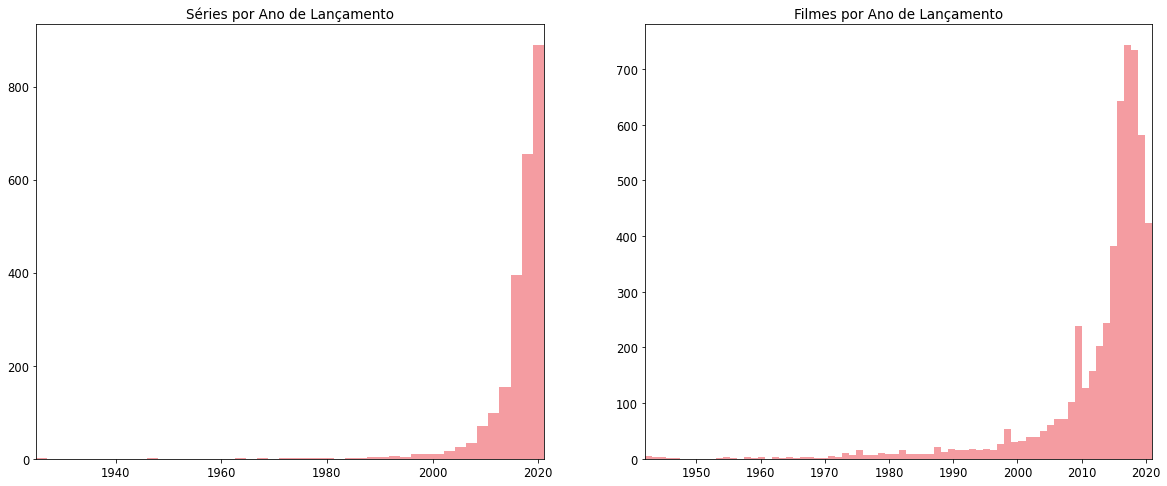

In [145]:
# Histogramas da distribuição de títulos por ano de lançamento

release_shows = netflix_dados[netflix_dados.type == 'TV Show'].release_year.dt.year
release_movies = netflix_dados[netflix_dados.type == 'Movie'].release_year.dt.year
Plota_histograma(release_shows, release_movies, 'Séries por Ano de Lançamento', 'Filmes por Ano de Lançamento')

In [146]:
# Estatísticas básicas (valor máximo e percentil)

print(f'No caso dos filmes:\nA mediana é {release_movies.median()}.\nO ano que mais aparece é {release_movies.value_counts().idxmax()}.')
print(f'\nNo caso das séries:\nA mediana é {release_shows.median()}.\nO ano que mais aparece é {release_shows.value_counts().idxmax()}.')
print('')

No caso dos filmes:
A mediana é 2016.0.
O ano que mais aparece é 2017.

No caso das séries:
A mediana é 2018.0.
O ano que mais aparece é 2020.



- Análise Estatística Básica:
    - No caso dos filmes:
        Isso indica que aproximadamente metade dos filmes (metade) se concentra em um período muito pequeno de tempo (2016 - 2021) e que após 2017 há uma queda na quantidade de títulos.
    - PS: release_year séries - ano de lançamento da última temporada

- Conclusões:
    - Em relação à data de lançamento, é possível perceber que a maior parte dos títulos é recente. No caso das séries, a maioria das obras concentra-se entre 2019 e 2021, de maneira que quanto mais recente o ano, maior a quantidade de títulos (provavelmente devido a quantidade de novas séries próprias da empresa). No caso dos filmes, há uma tendência crescente na quantidade de obras lançadas até 2017, diminuindo após essa data (possivelmente por ser mais difícil adquirir filmes recentes para a coleção). Assim, a Netflix oferece um catálogo muito bom pra quem quer ficar ligado nas novidades, mas não tão variado para aqueles que desejam consumir títulos mais antigos.

### Duração

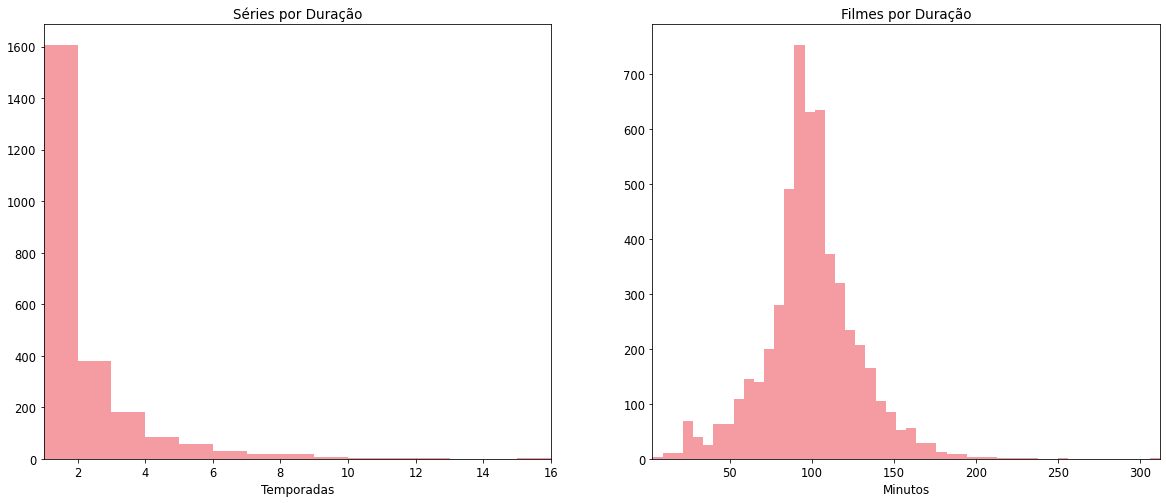

In [147]:
# Histogramas da distribuição de títulos por duração

#Séries
duration_shows = netflix_dados[netflix_dados.type == 'TV Show'].duration.str.split().map(lambda x: x[0])
duration_shows = duration_shows.astype('int64')

# Filmes
duration_movies = netflix_dados[netflix_dados.type == 'Movie'].duration.str.split().map(lambda x: x[0])
duration_movies = duration_movies.astype('int64')

Plota_histograma(duration_shows, duration_movies, 'Séries por Duração', 'Filmes por Duração', 'Temporadas', 'Minutos', True, False)


- Observações importantes:
- Séries:
    - Maioria tem uma temporada.
    - Pouquíssimas tem mais de 10 temporadas.
    - Maioria esmagadora vêm de 2000 pra cá, com tendência crescente.
    - Há várias séries produzidas pela Netflix, o que facilita aumentar o número.
    - Movivos possíveis: Possivelmente, séries mais curtas são mais fáceis de se produzir, o que as torna mais baratas para aquisição pela Netflix, e mais rápidas de se consumir, entretendo os consumirdores por menos tempo. Além disso, para serem produzidas diversas temporadas de uma série, ela precisa ser famosa e gerar engajamento, o que só é possível em casos de extremo sucesso. Assim, séries mais curtas (e provavelmente de menor sucesso) são maioria esmagadora e acabam por existir poucas séries maiores (e provavelmente de maior sucesso).

- Filmes:
    - Maioria concentra-se em torno de 100 minutos de duração.
    - Filmes com menos de 50 min ou mais de 150 são minoria.
    - Mais distribuídos que as séries (maior quantidade de filmes de 1970-2000).
    - Tendência crescente até 2016 (aprox.), mas queda depois desse ponto.
    - A maioria dos filmes é comprada de outras empresas, o que dificulta aumentar o número de títulos.


In [148]:
print(f'No caso dos filmes:\nA média é {duration_movies.mean():.2f}.\nA mediana é {duration_movies.median():.2f}.')

No caso dos filmes:
A média é 99.31.
A mediana é 98.00.


- Análise Estatística Básica:
    - A proximidade entre média e mediana indica que a distribuição está bem centralizada em torno desses valores.

<ipython-input-149-e8f5c4da9616>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().spines['right'].set_visible(False)
<ipython-input-149-e8f5c4da9616>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().spines['top'].set_visible(False)


<AxesSubplot:title={'center':'Duração de Séries por Ano de Lançamento'}, xlabel='Ano de Lançamento'>

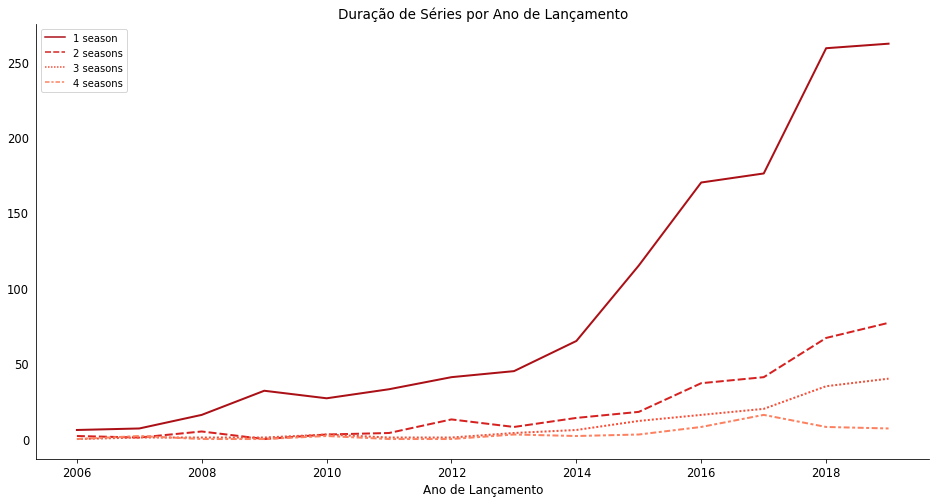

In [149]:
# Gráfico de linha da quantidade de títulos por ano de lançamento por duração

# Séries


df_1 = Prepara_dataframe('TV Show', 'duration', 0, 4) 

# configurando tamanho de figura, título, textos dos eixos x e y e títulos dos eixos x e y
tamanho_titulo, tamanho_x, tamanho_y, rotulo_x = 13.5, 11.5, 11.5, 12
plt.figure(figsize=(16, 8))
plt.title('Duração de Séries por Ano de Lançamento', fontsize=tamanho_titulo)
plt.tick_params(axis='y', labelsize=tamanho_y, left=False)
plt.tick_params(axis='x', labelsize=tamanho_x)
plt.xlabel('Ano de Lançamento', fontsize=rotulo_x)

# configurando cor dos plots
paleta = sns.color_palette('Reds_r') 
sns.set_palette(paleta) 

# retirando bordas superior e direita dos gráficos do seaborn
plt.axes().spines['right'].set_visible(False)
plt.axes().spines['top'].set_visible(False)

# plotando figura
sns.lineplot(data=df_1.iloc[-16:-2,], linewidth=2)

- Conclusões:
    - No caso do tempo, é possível perceber que os filmes foram registrados por meio de minutos de tela, enquanto as séries o foram por temporadas, gerando distribuições diferentes. No primeiro caso, é possível perceber que a maioria dos filmes se concentra em torno de 1 hora e 30 minutos de duração, sugerindo que há poucos curtas e filmes extremamente longos. No segundo, pode-se perceber que a maioria esmagadora das séries tem uma temporada, o que mostra a preocupação da Netflix em oferecer uma grande variedade de séries curtas e de consumo rápido. Além disso, observando-se o segundo gráfico, é possível perceber que a maior parte das séries são não só curtas como também recentes, o que reforça ainda mais a ideia de diversificação por meio de quantidade e inovação. Assim, a empresa oferece um catálogo de filmes com uma duração “padrão” e séries curtas e recentes.

### País

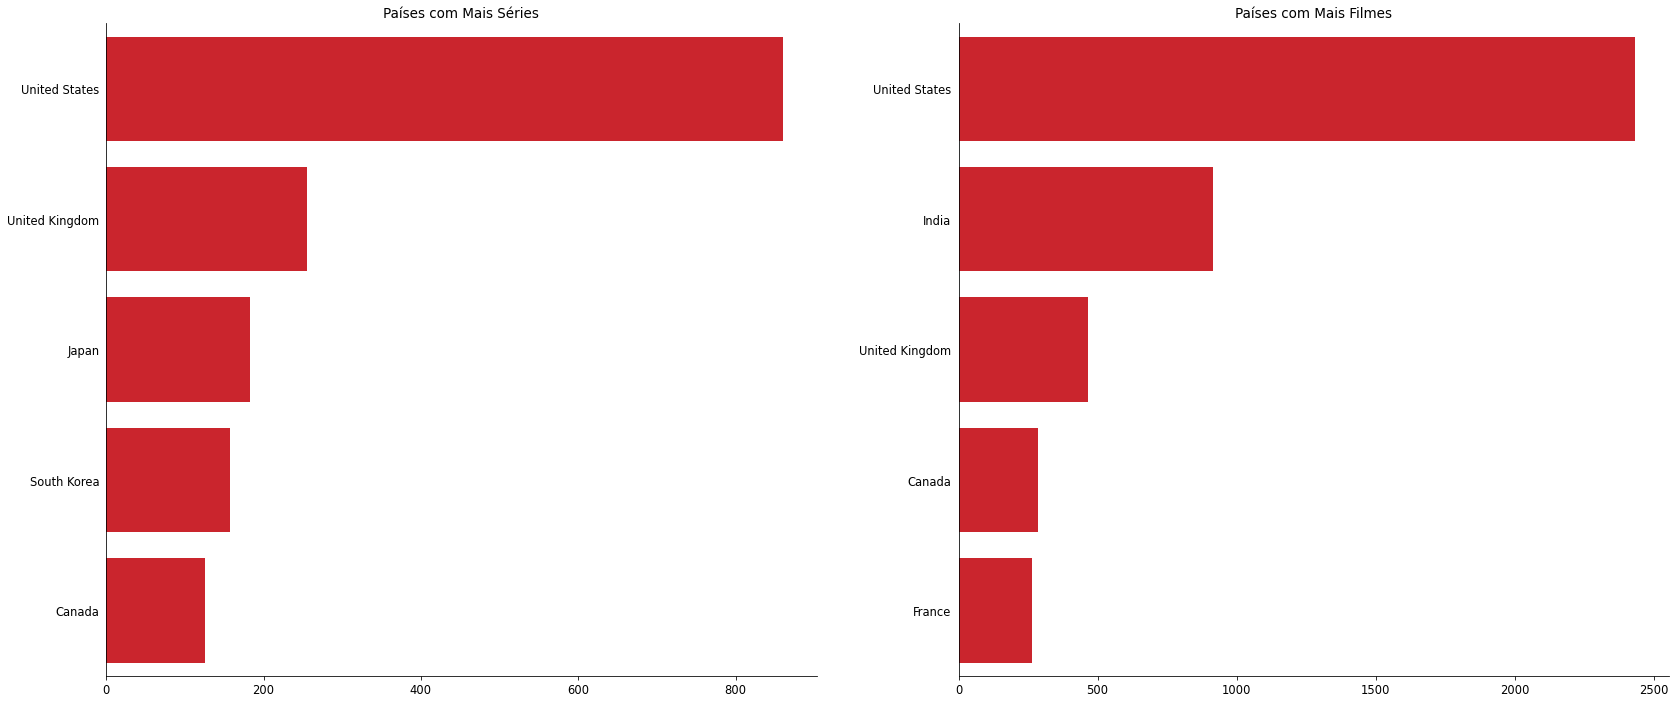

In [150]:
# Gráficos de barras da quantidade de títulos por país

nomes_paises_series =  Prepara_texto('TV Show', 'country')
nomes_paises_filmes = Prepara_texto('Movie', 'country')
Plota_primeiros_barras(nomes_paises_series, nomes_paises_filmes, 'Países com Mais Séries', 'Países com Mais Filmes')

- Observações importantes:
- Séries:
    - Estados Unidos em primeiro - maior produção ocidental de séries, possivelmente pela Netflix ser dos EUA (grande parte das séries de produção da prórpria Netflix incluem-se dentro da categoria EUA).
    - Coréia do Sul - séries do gênero k-drama são uma parcela considerável da Netflix.

- Filmes:
    - Índia - segundo lugar, proavelmente devido à grande produção cinematográfica de Bollywood.

In [151]:
# Análise exploratória para verificar se animes formam uma parcela expressiva das séries japonesas da Netflix

japan_shows = netflix_dados[netflix_dados.country.str.lower() == 'japan']
numero_animes = 0

for palavra in japan_shows['listed_in']:
    if 'anime' in str(palavra).lower():
        numero_animes += 1
        
print(f'A proporção entre animes e séries japonesas é de : {numero_animes / len(japan_shows):.2f}')

A proporção entre animes e séries japonesas é de : 0.76


- Análise Exploratória Básica:
    - Supondo-se que a palavra anime só aparece uma vez na categoria (listed_in) de cada série japonesa que for, de fato, um anime, temos que mais de 70% das séries japonesas são animes.


- Conclusões:
    - Analisando-se a quantidade de obras por país, é possível perceber, por um lado, o destaque de países específicos em certos ramos da indústria audiovisual e, por outro, o caráter ocidental dos títulos da Netflix. Em relação às séries, destaques notáveis são o Japão – devido à quantidade de animes – e a Coréia do Sul – possivelmente relacionado ao crescimento das séries jovens coreanas . Em relação aos filmes, vale citar a expressiva proporção dos títulos indianos na plataforma, representando a força da indústria cinematográfica do país, conhecida mundialmente pelas produções boolywoodianas. Além disso, vale citar que em ambos os casos, a maior parte dos títulos tem participação dos países ocidentais em sua produção. Portanto, a empresa oferece um catálogo direcionado ao público ocidental, mas contendo também obras de setores de destaque internacional, como os animes japoneses, séries coreanas e filmes indianos.

### Gênero

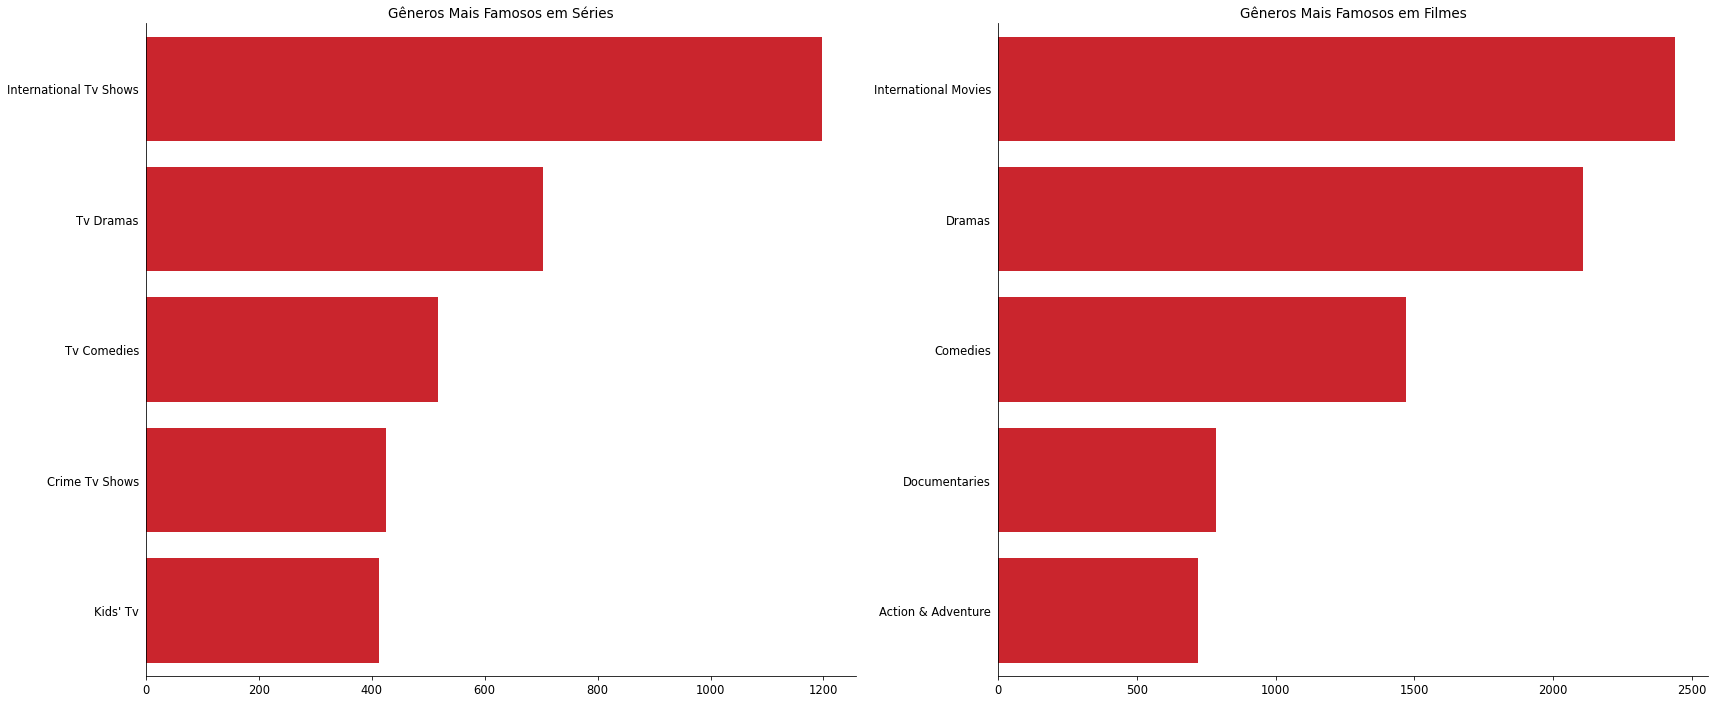

In [152]:
# Gráficos de barras da quantidade de títulos por gênero

nomes_paises_series =  Prepara_texto('TV Show', 'listed_in')
nomes_paises_filmes = Prepara_texto('Movie', 'listed_in')
Plota_primeiros_barras(nomes_paises_series, nomes_paises_filmes, 'Gêneros Mais Famosos em Séries', 'Gêneros Mais Famosos em Filmes')

- Conclusões:
    - Quanto ao gênero, a maior parte dos títulos concentra-se em categorias mais tradicionais como internacional, drama e comédia, apesar de existirem destaques em outras. No caso das séries, vale citar que o gênero crime está acima do infantil, o que sugere um direcionamento ao público adulto e adolescente em detrimento do mais jovem. No caso dos filmes, é interessante notar que documentários estão presentes em uma proporção maior que ação e aventura, sugerindo que também há conteúdo mais técnico para aqueles que o desejarem. Assim, a Netflix foca seus títulos em gêneros famosos na atualidade, focados no público adulto, mas oferece opções como documentários para a audiência não convencional.


### Rating

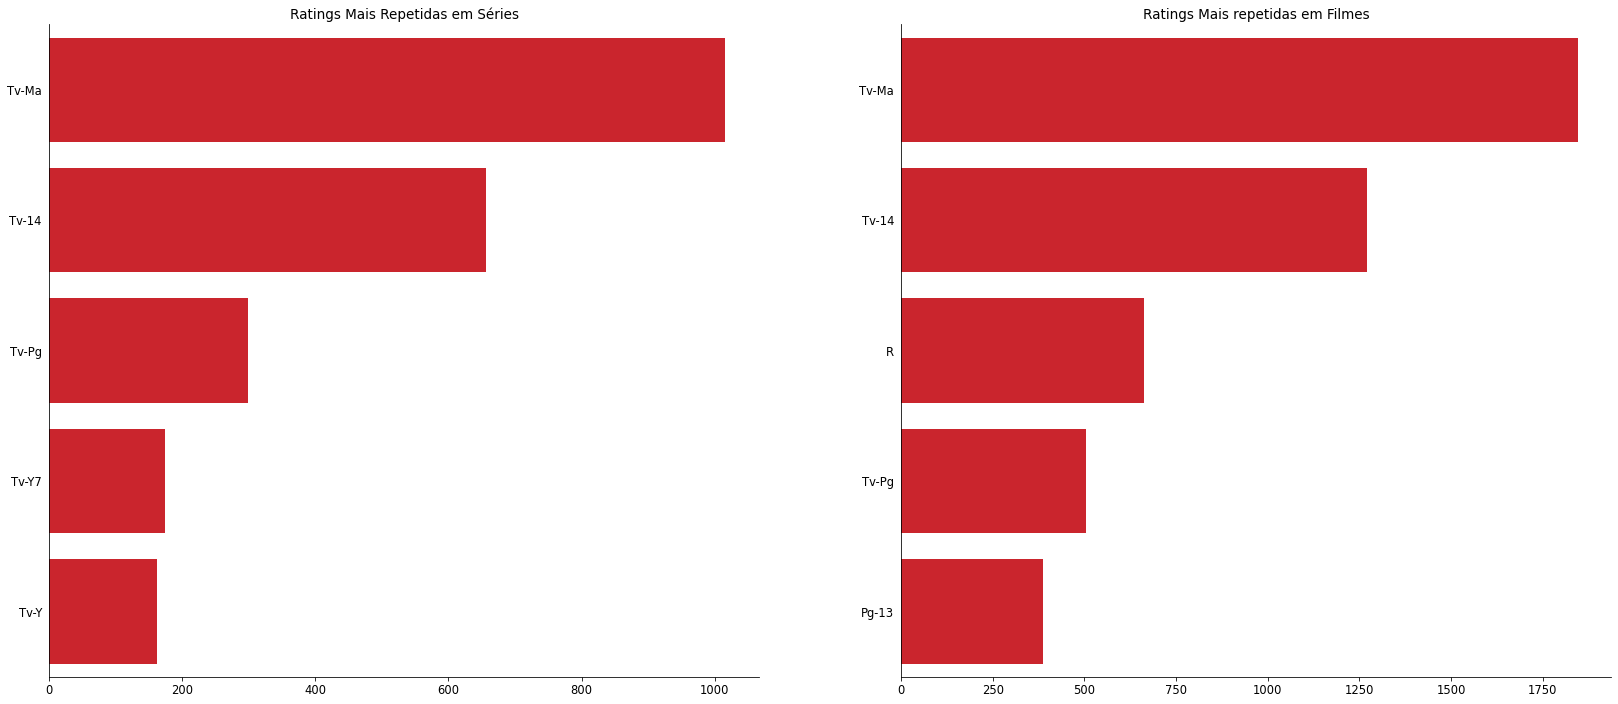

In [153]:
# Gráficos de barras da quantidade de títulos por rating

nomes_paises_series =  Prepara_texto('TV Show', 'rating')
nomes_paises_filmes = Prepara_texto('Movie', 'rating')
Plota_primeiros_barras(nomes_paises_series, nomes_paises_filmes, 'Ratings Mais Repetidas em Séries', 'Ratings Mais repetidas em Filmes')

- Guia das Siglas Americanas de Classificação Indicatória:
    - tv-ma - adultos (17+)
    - tv-14 - crianças 14+
    - tv-pg - sugestão de controle familiar (pais podem achar impróprio)
    - tv-y7 - crianças 7+
    - tv-y - todas as crianças
    - tv-g - aberto a todos
    - ry - sem classificação
    - r - restricted
    - tv-y7-fv - crianças 7+ com certa violência
    - pg-13 - mesmo que pg, mas para crianças 13-
- Link - parental ratings: http://www.tvguidelines.org/resources/TV_Parental_guidelines_Brochure.pdf 




- Observações Importantes:
- Séries: 
    - TV-MA, TV-14, TV-PG - maioria das séries. Isso mostra que conteúdo de séries da Netflix é voltado ao público adulto
    - TV-Y7, TV-Y - em menor quantidade. Isso mostra que a Netflix tem poucas séries para crianças

- Filmes:
    - TV-MA, TV-14, R, PG-13, TV-PG - considerando-se essas categorias, no caso dos filmes, a parcela de filmes com restrições é ainda maior


- Conclusões:
    - Para explicar a distribuição dos títulos por ratings (classificação etária) é necessário, antes de qualquer análise, explicitar qual a recomendação de idade a que cada sigla é referente: não recomendável para crianças, como TV-MA, TV-14, R; recomendável para crianças, como TV-Y7, TV-Y, TV-G. Observando-se o gráfico, é possível perceber que tanto em filmes quanto em séries, as obras direcionadas para ao primeiro público (não infantil) são maioria. Assim, é possível concluir que a empresa tem um catálogo mais voltado ao público adulto do que ao infantil.

# Conslusão 

- Conclusão: 
    - Após todas essas análises, podemos voltar à pergunta inicial: “Qual é o público melhor atendido pela empresa?”  Podemos responder essa questão observando as características das obras presentes no catálogo da empresa. Através desse esforço, é possível perceber que a maioria dos títulos são recentes, ocidentais, voltados a adultos e enquadram-se nos gêneros tradicionais (internacional, comédia e drama). Apesar disso, também existem títulos para outros nichos, como animes japoneses, séries coreanas, filmes indianos e uma parcela de conteúdo infantil. Vale também citar também que as séries, em sua maioria, são curtas (1 ou 2 temporadas), o que oferece um apelo maior a consumidores que desejem um conteúdo curto e recente. Assim, percebemos que a empresa oferece opções para diversos públicos, mas apresenta uma tendência dominante, voltando-se à audiência ocidental, adulta e com preferência por gêneros audiovisuais já consagrados.


# Fim do Artigo

### Conteúdo Extra - Outras Visualizações

In [ ]:
# Gráficos de barras da quantidade de títulos por elenco

nomes_paises_series =  Prepara_texto('TV Show', 'cast')
nomes_paises_filmes = Prepara_texto('Movie', 'cast')
Plota_primeiros_barras(nomes_paises_series, nomes_paises_filmes, 'Atores Mais Famosos em Séries', 'Atores Mais Famosos em Filmes')

- Observações Importantes:
- Séries:
    - 8/9 nomes presentes são de asiáticos - ao que tudo indica, vários deles são dubladores 

- Filmes:
    - 9/9 nomes presentes são de atores indiano famosos

In [ ]:
# Gráficos de barras da quantidade de títulos por direção

nomes_paises_series =  Prepara_texto('TV Show', 'director')
nomes_paises_filmes = Prepara_texto('Movie', 'director')
Plota_primeiros_barras(nomes_paises_series, nomes_paises_filmes, 'Diretores Mais Famosos em Séries', 'Diretores Mais Famosos em Filmes')

Hipótese - diretores com mais filmes na netflix são os que mais produziram filmes exclusivos para a netflix

In [ ]:
# Gráfico de linha da quantidade de títulos por ano de lançamento por gênero

df_1 = Prepara_dataframe('TV Show', 'listed_in', 0, 4)
df_2 = Prepara_dataframe('Movie', 'listed_in', 0, 4)
Plota_primeiros_linhas(df_1.iloc[-20:-2,], df_2.iloc[-30:-2,], 'Shows', 'Movies')

In [ ]:
# Gráfico de linha da quantidade de títulos por ano de lançamento por país

df_1 = Prepara_dataframe('TV Show', 'country', 0, 4)
df_2 = Prepara_dataframe('Movie', 'country', 0, 4)
Plota_primeiros_linhas(df_1.iloc[-20:-2,], df_2.iloc[-30:-2,], 'Shows', 'Movies')

In [ ]:
# Gráfico de linha da quantidade de títulos por ano de lançamento 

df_1 = Prepara_dataframe('TV Show', 'type', 0, 4)
df_2 = Prepara_dataframe('Movie', 'type', 0, 4)
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_1.iloc[:-2,], palette=['red'])
sns.lineplot(data=df_2.iloc[:-2,], palette=['black'])